In [1]:
# Objective: to predict the survival of coronary artery disease patients

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
sns.set_style("whitegrid")

In [5]:
# to import in dataset
df = pd.read_csv("C:/Users/miche/Desktop/AI_Singapore/Beta test AI Singapore/classification_bonus_practice_data.csv")

In [7]:
# to display variables in the dataset
df.head()

,ID,Survive,Gender,Smoke,Diabetes,Age,Ejection Fraction,Sodium,Creatinine,Platelets,Creatine phosphokinase,Blood Pressure,Hemoglobin,Height,Weight,Favorite color
0,TIG1GE,0,Male,Yes,Normal,50,Low,141,0.7,266000.0,185,105,12.3,180,93,green
1,VXUCV9,1,Male,No,Normal,75,Low,134,2.5,224000.0,99,162,13.0,140,47,black
2,AFH4F1,1,Female,No,Pre-diabetes,80,Low,135,1.3,192000.0,776,179,12.4,150,61,white
3,ZK6PAC,0,Male,No,Normal,-60,Low,136,0.9,228000.0,2261,136,15.3,130,48,yellow
4,6CVBRT,0,Female,No,Normal,70,Low,141,0.9,358000.0,1202,171,13.3,177,64,blue


In [9]:
# to check datatypes of variables, 'Survive' seems to be in a wrong data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      15000 non-null  object 
 1   Survive                 15000 non-null  object 
 2   Gender                  15000 non-null  object 
 3   Smoke                   15000 non-null  object 
 4   Diabetes                15000 non-null  object 
 5   Age                     15000 non-null  int64  
 6   Ejection Fraction       15000 non-null  object 
 7   Sodium                  15000 non-null  int64  
 8   Creatinine              14501 non-null  float64
 9   Platelets               15000 non-null  float64
 10  Creatine phosphokinase  15000 non-null  int64  
 11  Blood Pressure          15000 non-null  int64  
 12  Hemoglobin              15000 non-null  float64
 13  Height                  15000 non-null  int64  
 14  Weight                  15000 non-null

In [11]:
# to check for missing values
df.isnull().sum()

ID                          0
Survive                     0
Gender                      0
Smoke                       0
Diabetes                    0
Age                         0
Ejection Fraction           0
Sodium                      0
Creatinine                499
Platelets                   0
Creatine phosphokinase      0
Blood Pressure              0
Hemoglobin                  0
Height                      0
Weight                      0
Favorite color              0
dtype: int64

In [13]:
# to view missing % of each variable
100* df.isnull().sum()/len(df)

ID                        0.000000
Survive                   0.000000
Gender                    0.000000
Smoke                     0.000000
Diabetes                  0.000000
Age                       0.000000
Ejection Fraction         0.000000
Sodium                    0.000000
Creatinine                3.326667
Platelets                 0.000000
Creatine phosphokinase    0.000000
Blood Pressure            0.000000
Hemoglobin                0.000000
Height                    0.000000
Weight                    0.000000
Favorite color            0.000000
dtype: float64

In [15]:
# to check for duplicated values
duplicates = df[df.duplicated()]

In [17]:
# there are no duplicated values
duplicates

,ID,Survive,Gender,Smoke,Diabetes,Age,Ejection Fraction,Sodium,Creatinine,Platelets,Creatine phosphokinase,Blood Pressure,Hemoglobin,Height,Weight,Favorite color


In [19]:
df['Survive'].value_counts()

Survive
0      9581
1      4552
No      604
Yes     263
Name: count, dtype: int64

In [21]:
# 'Survive' contains 0, 1, 'No', 'Yes', we need to standardize the class, to map 'No': 0 and 'Yes': 1
df['Survive'] = df['Survive'].replace('No', 0)
df['Survive'] = df['Survive'].replace('Yes', 1)

In [23]:
df['Survive']

0        0
1        1
2        1
3        0
4        0
        ..
14995    0
14996    1
14997    0
14998    0
14999    1
Name: Survive, Length: 15000, dtype: object

In [25]:
# to convert 'Survive' into an integer variable
df['Survive'] = df['Survive'].astype('int')

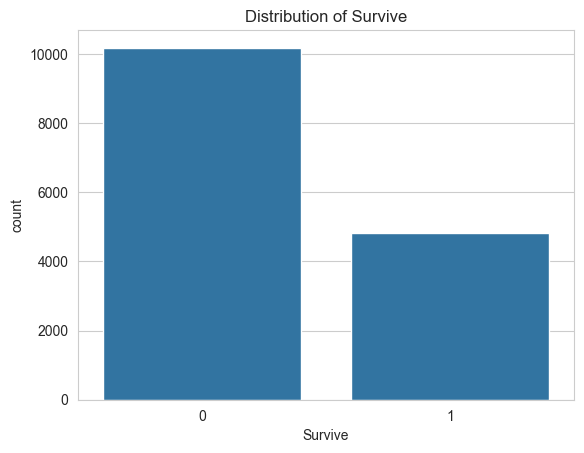

In [27]:
sns.countplot(data=df, x='Survive')
plt.title('Distribution of Survive')
plt.show()

In [29]:
df['Survive'].value_counts()

Survive
0    10185
1     4815
Name: count, dtype: int64

In [31]:
# 67.9% of patients did not survive coronary artery disease
100* df['Survive'].value_counts()/len(df)

Survive
0    67.9
1    32.1
Name: count, dtype: float64

In [33]:
# to print categorical variables only
df.select_dtypes('object')

,ID,Gender,Smoke,Diabetes,Ejection Fraction,Favorite color
0,TIG1GE,Male,Yes,Normal,Low,green
1,VXUCV9,Male,No,Normal,Low,black
2,AFH4F1,Female,No,Pre-diabetes,Low,white
3,ZK6PAC,Male,No,Normal,Low,yellow
4,6CVBRT,Female,No,Normal,Low,blue
...,...,...,...,...,...,...
14995,91MBFV,Male,Yes,Normal,Low,blue
14996,3BK9WM,Male,Yes,Normal,Low,green
14997,01ZP6F,Female,No,Normal,Low,blue
14998,JMSGEG,Male,No,Normal,Low,red


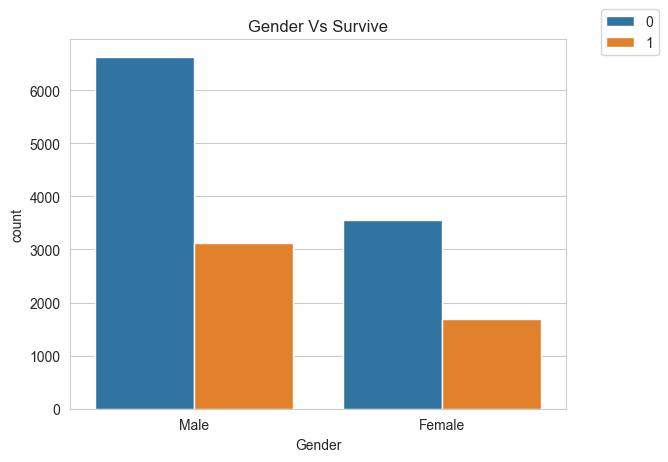

In [35]:
# many male patients did not survive coronary artery disease
sns.countplot(data=df, x='Gender', hue='Survive')
plt.title('Gender Vs Survive')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.show()

In [37]:
# variable 'Smoke' has 4 different categories when rightly there should only be 4 categories
df['Smoke'].value_counts()

Smoke
No     9710
Yes    4707
NO      399
YES     184
Name: count, dtype: int64

In [39]:
df['Smoke'] = df['Smoke'].replace('NO','No')
df['Smoke'] = df['Smoke'].replace('YES','Yes')

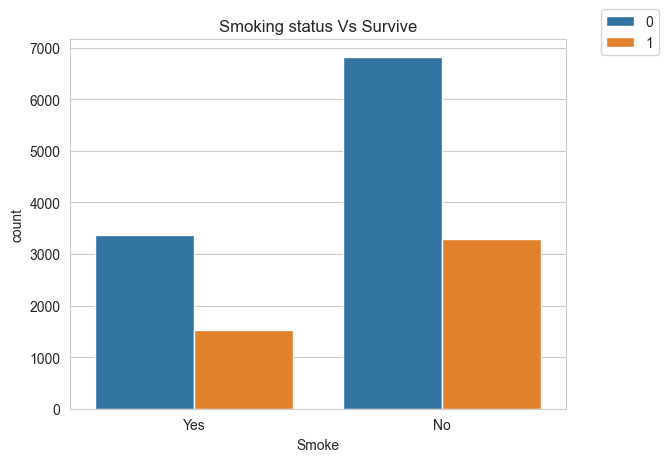

In [41]:
sns.countplot(data=df, x='Smoke', hue='Survive')
plt.title('Smoking status Vs Survive')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.show()

In [43]:
df['Diabetes'].value_counts()

Diabetes
Normal          8789
Pre-diabetes    3124
Diabetes        3087
Name: count, dtype: int64

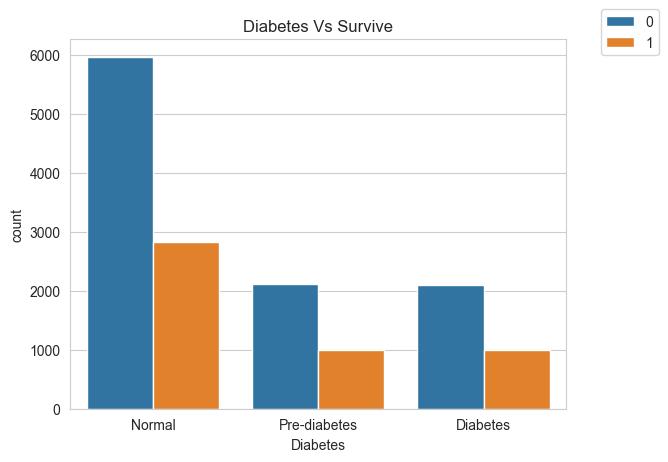

In [47]:
# it is observed that patients who are non-diabetics has the highest survival rate
sns.countplot(data=df, x='Diabetes', hue='Survive')
plt.title('Diabetes Vs Survive')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.show()

In [49]:
# variable 'Ejectiion Fraction' has 5 different categories, when there should only be 3 categories
df['Ejection Fraction'].value_counts()

Ejection Fraction
Low       12734
Normal     1658
L           482
N            66
High         60
Name: count, dtype: int64

In [51]:
# to standardize categories in 'Ejection Fraction'
df['Ejection Fraction'] = df['Ejection Fraction'].replace('L','Low')
df['Ejection Fraction'] = df['Ejection Fraction'].replace('N','Normal')

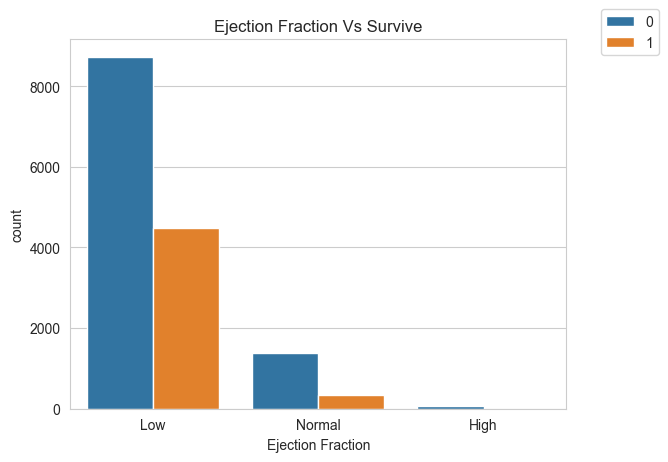

In [53]:
sns.countplot(data=df, x='Ejection Fraction', hue='Survive')
plt.title('Ejection Fraction Vs Survive')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.show()

In [55]:
# to print descriptive statistics of all numeric variables
df.select_dtypes(['int','float']).describe().T

,count,mean,std,min,25%,50%,75%,max
Survive,15000.0,0.321000,0.466876,0.0,0.0,0.0,1.0,1.0
Age,15000.0,57.428467,23.411173,-95.0,50.0,60.0,70.0,95.0
Sodium,15000.0,136.604267,4.364890,113.0,134.0,137.0,140.0,148.0
Creatinine,14501.0,1.410195,1.044535,0.5,0.9,1.1,1.4,9.4
Platelets,15000.0,263096.016490,98056.330340,25100.0,211000.0,262000.0,304000.0,850000.0
Creatine phosphokinase,15000.0,580.151800,955.418765,23.0,115.0,250.0,582.0,7861.0
Blood Pressure,15000.0,103.676667,39.700138,40.0,70.0,100.0,137.0,179.0
Hemoglobin,15000.0,12.910667,2.500152,9.0,10.7,12.7,15.1,17.5
Height,15000.0,159.475200,17.344439,130.0,144.0,160.0,174.0,189.0
Weight,15000.0,69.340467,25.298287,19.0,50.0,66.0,87.0,141.0


In [57]:
# there are outlier values in age
# youngest = -95, oldest = 95
# average age of patients = 57 years
df['Age'].describe()

count    15000.000000
mean        57.428467
std         23.411173
min        -95.000000
25%         50.000000
50%         60.000000
75%         70.000000
max         95.000000
Name: Age, dtype: float64

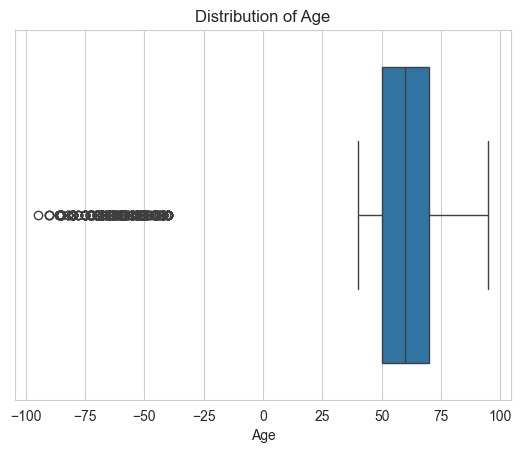

In [59]:
# most of the outlier values are at the lower end of the spectrum
sns.boxplot(data=df, x='Age')
plt.title('Distribution of Age')
plt.show()

In [61]:
# to remove outlier values in Age using IQR method, first quantile = 0.25 or 25%
a_Q1_25 = df['Age'].quantile(0.25)
a_Q1_25

50.0

In [63]:
# 3rd quantile = 75%
a_Q3_75 = df['Age'].quantile(0.75)
a_Q3_75

70.0

In [65]:
# to find IQR for 'Age'
IQR = a_Q3_75 - a_Q1_25
IQR

20.0

In [67]:
# Age lower limits
age_lower_limit = 50 - 1.5 * 20
age_lower_limit

20.0

In [69]:
# to find lower limit outliers in 'age'
age_lower_array = df[df['Age'] > age_lower_limit]

In [71]:
# to remove outliers in 'Age'
df2 = df[df['Age'] > age_lower_limit]
df2.shape

(14570, 16)

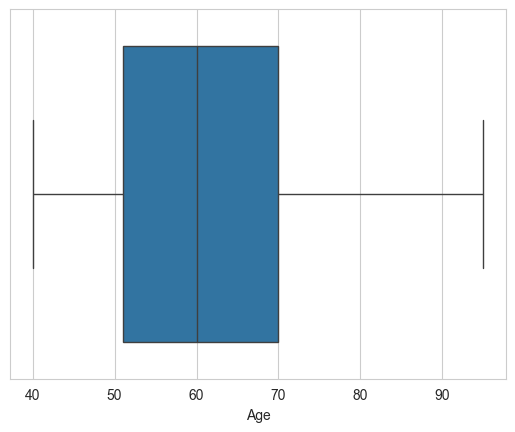

In [73]:
# outlier values in 'Age' has been removed
sns.boxplot(data=df2, x='Age')
plt.show()

In [75]:
# youngest = 40 years
# oldest = 95 years
df2['Age'].describe()

count    14570.000000
mean        60.895127
std         11.884924
min         40.000000
25%         51.000000
50%         60.000000
75%         70.000000
max         95.000000
Name: Age, dtype: float64

In [77]:
# to write a custom function for 'Age'
def age_categories(s):
    if 40 <= s <= 50:
        return "40 to 50"
    elif 51 <= s <= 60:
        return "51 to 60"
    elif 61 <= s <= 70:
        return "61 to 70"
    elif 71 <= s <= 80:
        return "71 to 80"
    elif 81 <= s <= 90:
        return "81 to 90"
    elif s >= 91:
        return "above 91"

In [79]:
# to create new variable by applying custom function apply()
df2['age_categories'] = df2['Age'].apply(age_categories)

C:\Users\miche\AppData\Local\Temp\ipykernel_21460\2517494867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['age_categories'] = df2['Age'].apply(age_categories)


In [81]:
df2.head()

,ID,Survive,Gender,Smoke,Diabetes,Age,Ejection Fraction,Sodium,Creatinine,Platelets,Creatine phosphokinase,Blood Pressure,Hemoglobin,Height,Weight,Favorite color,age_categories
0,TIG1GE,0,Male,Yes,Normal,50,Low,141,0.7,266000.0,185,105,12.3,180,93,green,40 to 50
1,VXUCV9,1,Male,No,Normal,75,Low,134,2.5,224000.0,99,162,13.0,140,47,black,71 to 80
2,AFH4F1,1,Female,No,Pre-diabetes,80,Low,135,1.3,192000.0,776,179,12.4,150,61,white,71 to 80
4,6CVBRT,0,Female,No,Normal,70,Low,141,0.9,358000.0,1202,171,13.3,177,64,blue,61 to 70
5,5JAQ9G,1,Male,No,Normal,55,Low,138,1.1,314000.0,2017,88,16.5,176,58,red,51 to 60


In [83]:
df2['age_categories'].unique()

array(['40 to 50', '71 to 80', '61 to 70', '51 to 60', '81 to 90',
       'above 91'], dtype=object)

In [85]:
age_categories_order = ['40 to 50',
                        '51 to 60',
                        '61 to 70',
                        '71 to 80',
                        '81 to 90',
                        'above 91']

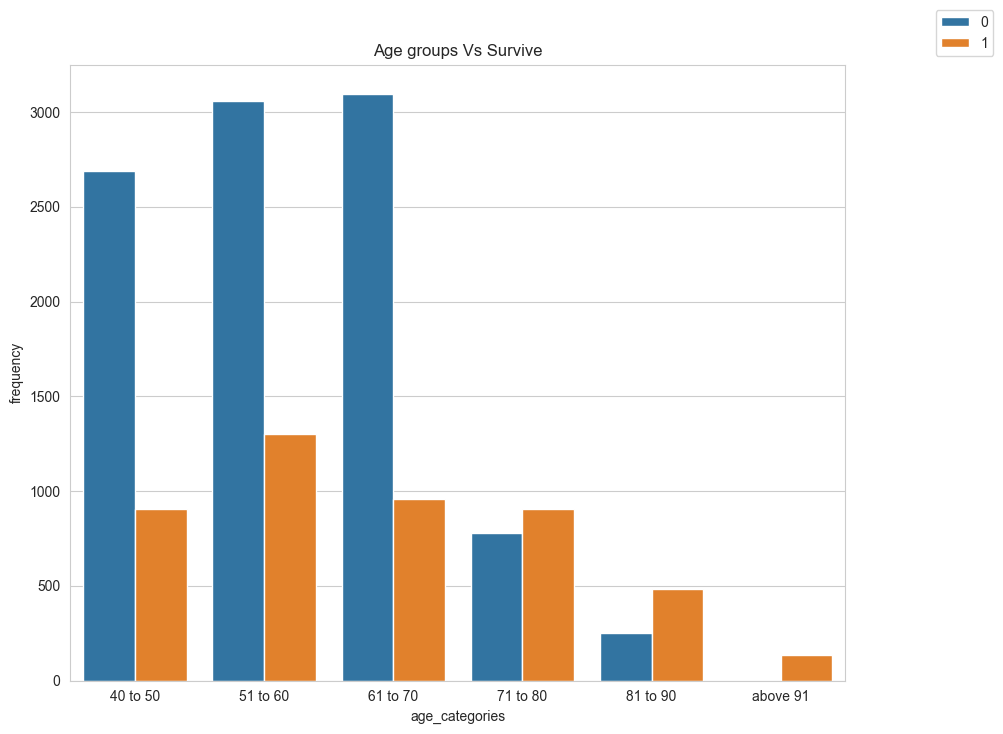

In [87]:
# a large number of patients aged '51 to 60 years' and '61 to 70 years' did not survive heart disease
plt.figure(figsize=(10,8), dpi=100)
sns.countplot(data=df2, x='age_categories', order =age_categories_order, hue='Survive')
plt.title('Age groups Vs Survive')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.ylabel('frequency')
plt.show()

In [89]:
# among the numeric variables, 'Weight' and 'Creatinine' levels are highly correlated with survival rate
df2.select_dtypes(['int','float']).corr()['Survive'].sort_values(ascending=False)

Survive                   1.000000
Weight                    0.413754
Creatinine                0.303602
Age                       0.254991
Blood Pressure            0.058685
Creatine phosphokinase    0.043125
Height                    0.005598
Platelets                -0.054880
Hemoglobin               -0.058954
Sodium                   -0.216331
Name: Survive, dtype: float64

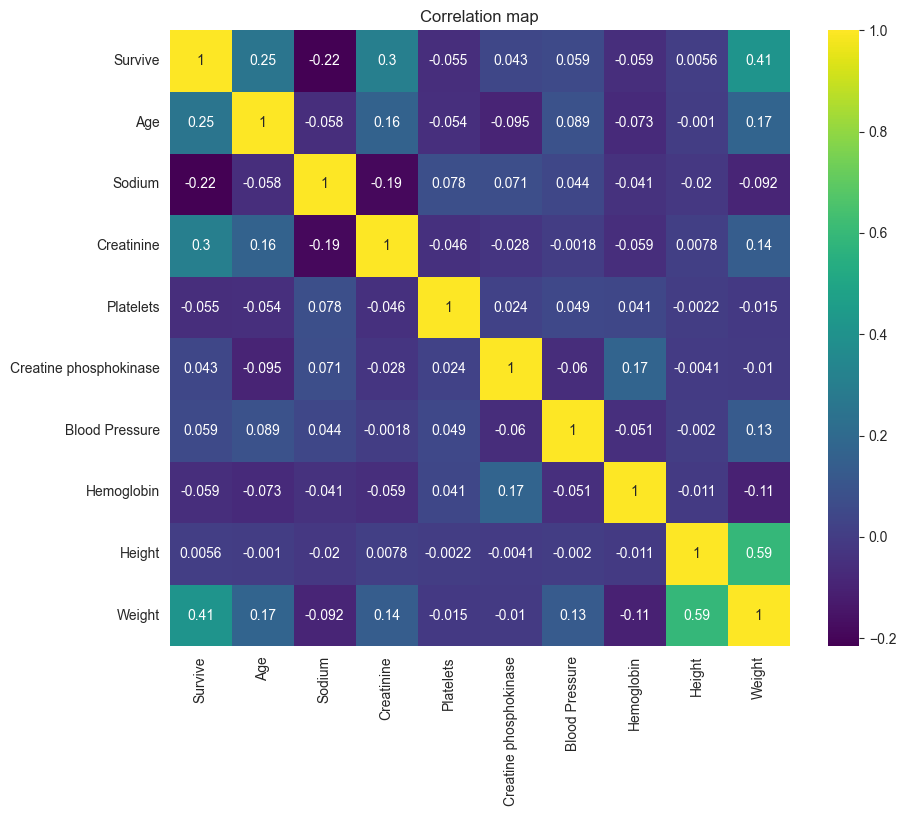

In [91]:
# to plot a correlation heatmap
plt.figure(figsize=(10, 8), dpi=100)
sns.heatmap(df2.select_dtypes(['int','float']).corr(), annot=True, cmap='viridis')
plt.title('Correlation map')
plt.show()

In [93]:
# to remove all missing values before predictive modelling
df2 = df2.dropna()

In [95]:
df2.isnull().sum()

ID                        0
Survive                   0
Gender                    0
Smoke                     0
Diabetes                  0
Age                       0
Ejection Fraction         0
Sodium                    0
Creatinine                0
Platelets                 0
Creatine phosphokinase    0
Blood Pressure            0
Hemoglobin                0
Height                    0
Weight                    0
Favorite color            0
age_categories            0
dtype: int64

In [97]:
# to remove variables not useful for further analysis
df2 = df2.drop(['ID','age_categories'], axis=1)

In [99]:
# to define X and y
X = df2.drop('Survive', axis=1)

In [101]:
y = df2['Survive']

In [103]:
# to convert categorical variables into dummy variables
X = pd.get_dummies(X, drop_first=True)

In [105]:
X

,Age,Sodium,Creatinine,Platelets,Creatine phosphokinase,Blood Pressure,Hemoglobin,Height,Weight,Gender_Male,Smoke_Yes,Diabetes_Normal,Diabetes_Pre-diabetes,Ejection Fraction_Low,Ejection Fraction_Normal,Favorite color_blue,Favorite color_green,Favorite color_red,Favorite color_white,Favorite color_yellow
0,50,141,0.7,266000.0,185,105,12.3,180,93,True,True,True,False,True,False,False,True,False,False,False
1,75,134,2.5,224000.0,99,162,13.0,140,47,True,False,True,False,True,False,False,False,False,False,False
2,80,135,1.3,192000.0,776,179,12.4,150,61,False,False,False,True,True,False,False,False,False,True,False
4,70,141,0.9,358000.0,1202,171,13.3,177,64,False,False,True,False,True,False,True,False,False,False,False
5,55,138,1.1,314000.0,2017,88,16.5,176,58,True,False,True,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,50,140,0.9,362000.0,298,109,11.8,178,51,True,True,True,False,True,False,True,False,False,False,False
14996,62,140,0.9,253000.0,231,141,14.6,171,114,True,True,True,False,True,False,False,True,False,False,False
14997,61,141,0.9,229000.0,84,173,9.2,156,71,False,False,True,False,True,False,True,False,False,False,False
14998,77,137,1.1,406000.0,109,154,11.3,130,32,True,False,True,False,True,False,False,False,True,False,False


In [107]:
from sklearn.model_selection import train_test_split

In [109]:
from sklearn.preprocessing import StandardScaler

In [111]:
# to split the dataset into training (80%) and test-validation (20%) sets
# 'stratify' is used for classification problems, to ensure that each split of the dataset maintains the same proportion of classes
# as the original dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

In [113]:
# to split the test validation set (20%) into validation (10%) and test (10%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=101, stratify=y_temp)

In [115]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [117]:
from xgboost import XGBClassifier

In [119]:
from sklearn.tree import DecisionTreeClassifier

In [121]:
# to initialize an instance of Standardscaler
scaler = StandardScaler()

In [123]:
# to scale, fit transform on the X train data to prevent data leakage to the y test set
scaled_X_train = scaler.fit_transform(X_train)

In [125]:
scaled_X_val = scaler.fit_transform(X_val)

In [127]:
# to transform on the X testing set
scaled_X_test = scaler.transform(X_test)

In [129]:
from sklearn.svm import SVC

In [131]:
from sklearn.linear_model import LogisticRegression

In [133]:
# to import KNN machine learning algorithm
from sklearn.neighbors import KNeighborsClassifier

In [135]:
from sklearn.model_selection import GridSearchCV

In [139]:
dt = DecisionTreeClassifier()

In [141]:
# to define the decision tree parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'], # Measure for split quality
    'max_depth': [None, 10, 20, 30, 40, 50], # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4] # Minimum samples required at a leaf node
}

In [143]:
# Set up GridSearchCV
dt_clf = GridSearchCV(estimator=dt, 
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=1,
                     scoring='accuracy')

In [145]:
# Fit GridSearchCV
dt_clf.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [183]:
# Best parameters and score
print("Best parameters found: ", dt_clf.best_params_)
print("Best score found: ", dt_clf.best_score_)

Best parameters found:  {'criterion': 'entropy', 'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score found:  0.9980477966674426


In [185]:
# to predict on X validation set
dt_model = dt_clf.best_estimator_
y_val_pred_dt = dt_model.predict(scaled_X_val)

In [187]:
# to import all evaluation metrics for classification model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [189]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [191]:
# to calculate metrics for Decision Tree validation set
val_accuracy_dt = accuracy_score(y_val, y_val_pred_dt)
val_precision_dt = precision_score(y_val, y_val_pred_dt)
val_recall_dt = recall_score(y_val, y_val_pred_dt)
val_f1_dt = f1_score(y_val, y_val_pred_dt)
val_roc_auc_dt = roc_auc_score(y_val, y_val_pred_dt)

In [193]:
print("Decision Tree Classifier Validation Metrics:")
print(f'Validation Accuracy: {val_accuracy_dt:.5f}')
print(f'Validation Precision: {val_precision_dt:.5f}')
print(f'Validation Recall: {val_recall_dt:.5f}')
print(f'Validation F1 Score: {val_f1_dt:.5f}')
print(f'Validation ROC AUC: {val_roc_auc_dt:.5f}')

Decision Tree Classifier Validation Metrics:
Validation Accuracy: 0.95955
Validation Precision: 0.91700
Validation Recall: 0.96588
Validation F1 Score: 0.94081
Validation ROC AUC: 0.96113


In [195]:
# to calculate metrics for Decision tree training 
dt_model = dt_clf.best_estimator_
y_train_pred_dt = dt_model.predict(scaled_X_train)

In [197]:
y_train_pred_proba_dt = dt_model.predict_proba(scaled_X_train)[:, 1]

In [199]:
train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
train_precision_dt = precision_score(y_train, y_train_pred_dt)
train_recall_dt = recall_score(y_train, y_train_pred_dt)
train_f1_dt = f1_score(y_train, y_train_pred_dt)
train_roc_auc_dt = roc_auc_score(y_train, y_train_pred_proba_dt)

In [203]:
print(" Decision tree classifier Training Set Metrics:")
print(f'Training Accuracy: {train_accuracy_dt:.5f}')
print(f'Training Precision: {train_precision_dt:.5f}')
print(f'Training Recall: {train_recall_dt:.5f}')
print(f'Training F1 Score: {train_f1_dt:.5f}')
print(f'Training ROC AUC: {train_roc_auc_dt:.5f}')

 Decision tree classifier Training Set Metrics:
Training Accuracy: 1.00000
Training Precision: 1.00000
Training Recall: 1.00000
Training F1 Score: 1.00000
Training ROC AUC: 1.00000


In [205]:
# to predict on the X testing set Decision tree
dt_model = dt_clf.best_estimator_
y_test_pred_dt = dt_model.predict(scaled_X_test)

In [207]:
# predict_proba to obtain the predicted probabilities for the validation data, focusing on the probability of positive class(1): Survive
y_test_pred_proba_dt = dt_model.predict_proba(scaled_X_test)[:, 1]

In [211]:
# to calculate and print the classification metrics for Decision tree
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
test_precision_dt = precision_score(y_test, y_test_pred_dt)
test_recall_dt = recall_score(y_test, y_test_pred_dt)
test_f1_dt = f1_score(y_test, y_test_pred_dt)
test_roc_auc_dt = roc_auc_score(y_test, y_test_pred_proba_dt)

print("Decision Tree Classifier Metrics:")
print(f'test Accuracy: {test_accuracy_dt:.5f}')
print(f'test Precision: {test_precision_dt:.5f}')
print(f'test Recall: {test_recall_dt:.5f}')
print(f'test F1 Score: {test_f1_dt:.5f}')
print(f'test ROC AUC: {test_roc_auc_dt:.5f}')

Decision Tree Classifier Metrics:
test Accuracy: 0.95742
test Precision: 0.92355
test Recall: 0.95106
test F1 Score: 0.93711
test ROC AUC: 0.95583


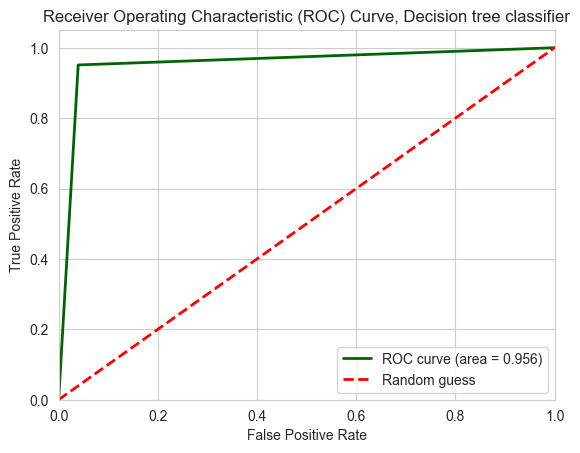

In [447]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba_dt)
roc_auc = roc_auc_score(y_test, y_test_pred_proba_dt)

# AUC score for Decision Tree classifier = 0.956
plt.figure()
plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve, Decision tree classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [215]:
# to initialize an instance of Random Forest model
rf = RandomForestClassifier()

In [217]:
# Define parameter grid (Random Forest)
param_grid = {
    'n_estimators': [100, 200, 300, 400],   # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],      # Minimum samples required at a leaf node 
    'max_features': ['sqrt', 'log2']   # Number of features to consider for the best split
}

In [219]:
# Set up GridSearchCV
rf_clf = GridSearchCV(estimator=rf, 
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=2)

In [221]:
# to fit the random forest classifier to the training data
rf_clf.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=2)

In [223]:
# Best parameters and score
print("Best parameters found: ", rf_clf.best_params_)
print("Best score found: ", rf_clf.best_score_)

Best parameters found:  {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score found:  1.0


In [225]:
rf_model = rf_clf.best_estimator_
y_val_pred_rf = rf_model.predict(scaled_X_val)

In [227]:
# to use predict_proba to obtain the predicted probabilities for the validation data focusing on the 
# probability of the positive class
y_val_pred_proba_rf = rf_model.predict_proba(scaled_X_val)[:, 1]

In [229]:
# to calculate metrics for Random Forest validation set
val_accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
val_precision_rf = precision_score(y_val, y_val_pred_rf)
val_recall_rf = recall_score(y_val, y_val_pred_rf)
val_f1_rf = f1_score(y_val, y_val_pred_rf)
val_roc_auc_rf = roc_auc_score(y_val, y_val_pred_rf)

In [231]:
print("Random Forest Classifier Validation Metrics:")
print(f'Validation Accuracy: {val_accuracy_rf:.5f}')
print(f'Validation Precision: {val_precision_rf:.5f}')
print(f'Validation Recall: {val_recall_rf:.5f}')
print(f'Validation F1 Score: {val_f1_rf:.5f}')
print(f'Validation ROC AUC: {val_roc_auc_rf:.5f}')

Random Forest Classifier Validation Metrics:
Validation Accuracy: 0.98652
Validation Precision: 0.97071
Validation Recall: 0.98934
Validation F1 Score: 0.97994
Validation ROC AUC: 0.98722


In [235]:
# to predict on X training set, Random Forest
rf_model = rf_clf.best_estimator_
y_train_pred_rf = rf_model.predict(scaled_X_train)

In [237]:
# to use predict_proba to obtain the predicted probabilities for the validation data focusing on the 
# probability of the positive class
y_train_pred_proba_rf = rf_model.predict_proba(scaled_X_train)[:, 1]

In [239]:
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
train_precision_rf = precision_score(y_train, y_train_pred_rf)
train_recall_rf = recall_score(y_train, y_train_pred_rf)
train_f1_rf = f1_score(y_train, y_train_pred_rf)
train_roc_auc_rf = roc_auc_score(y_train, y_train_pred_rf)

In [241]:
print("Random Forest classifier Training Set Metrics:")
print(f'Training Accuracy: {train_accuracy_rf:.5f}')
print(f'Training Precision: {train_precision_rf:.5f}')
print(f'Training Recall: {train_recall_rf:.5f}')
print(f'Training F1 Score: {train_f1_rf:.5f}')
print(f'Training ROC AUC: {train_roc_auc_rf:.5f}')

Random Forest classifier Training Set Metrics:
Training Accuracy: 1.00000
Training Precision: 1.00000
Training Recall: 1.00000
Training F1 Score: 1.00000
Training ROC AUC: 1.00000


In [243]:
# to predict on X testing set, Random Forest
y_test_pred_rf = rf_model.predict(scaled_X_test)

In [245]:
# to use predict_proba to obtain the predicted probabilities for the validation data focusing on the 
# probability of the positive class
y_test_pred_proba_rf = rf_model.predict_proba(scaled_X_test)[:, 1]

In [251]:
# to calculate and print the classification metrics for Decision tree
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
test_precision_rf = precision_score(y_test, y_test_pred_rf)
test_recall_rf = recall_score(y_test, y_test_pred_rf)
test_f1_rf = f1_score(y_test, y_test_pred_rf)
test_roc_auc_rf = roc_auc_score(y_test, y_test_pred_rf)

print("Random Forest Classifier Metrics:")
print(f'test Accuracy: {test_accuracy_rf:.5f}')
print(f'test Precision: {test_precision_rf:.5f}')
print(f'test Recall: {test_recall_rf:.5f}')
print(f'test F1 Score: {test_f1_rf:.5f}')
print(f'test ROC AUC: {test_roc_auc_rf:.5f}')

Random Forest Classifier Metrics:
test Accuracy: 0.98722
test Precision: 0.98291
test Recall: 0.97872
test F1 Score: 0.98081
test ROC AUC: 0.98510


In [255]:
# to build an AdaBoost classifier
ada = AdaBoostClassifier()

In [257]:
# Define the parameter grid, Ada Boost
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1, 10],
    'algorithm': ['SAMME']
}

In [259]:
# Initialize GridSearchCV with 5-fold cross-validation
ada_clf = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [261]:
# Fit the model on the training data
ada_clf.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME'],
                         'learning_rate': [0.01, 0.1, 1, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [263]:
# Print the best parameters and best score
print("Best Parameters:", ada_clf.best_params_)
print("Best Cross-Validation Accuracy:", ada_clf.best_score_)

Best Parameters: {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 150}
Best Cross-Validation Accuracy: 0.8526053598652451


In [265]:
# to predict on the X validation set, AdaBoost
ada_model = ada_clf.best_estimator_
y_val_pred_ada = ada_model.predict(scaled_X_val)

In [267]:
# to use predict_proba to obtain the predicted probabilities for the validation data focusing on the 
# probability of the positive class
y_val_pred_proba_ada = ada_model.predict_proba(scaled_X_val)[:, 1]

In [271]:
# to calculate metrics for AdaBoost validation set
val_accuracy_ada = accuracy_score(y_val, y_val_pred_ada)
val_precision_ada = precision_score(y_val, y_val_pred_ada)
val_recall_ada = recall_score(y_val, y_val_pred_ada)
val_f1_ada = f1_score(y_val, y_val_pred_ada)
val_roc_auc_ada = roc_auc_score(y_val, y_val_pred_ada)

print("AdaBoost Classifier Validation Metrics:")
print(f'Validation Accuracy: {val_accuracy_ada:.5f}')
print(f'Validation Precision: {val_precision_ada:.5f}')
print(f'Validation Recall: {val_recall_ada:.5f}')
print(f'Validation F1 Score: {val_f1_ada:.5f}')
print(f'Validation ROC AUC: {val_roc_auc_ada:.5f}')

AdaBoost Classifier Validation Metrics:
Validation Accuracy: 0.82683
Validation Precision: 0.77778
Validation Recall: 0.67164
Validation F1 Score: 0.72082
Validation ROC AUC: 0.78795


In [273]:
# to predict on the X testing set, AdaBoost
ada_model = ada_clf.best_estimator_
y_test_pred_ada = ada_clf.predict(scaled_X_test)

In [275]:
# to use predict_proba to obtain the predicted probabilities for the validation data focusing on the 
# probability of the positive class
y_test_pred_proba_ada = ada_model.predict_proba(scaled_X_test)[:,1]

In [279]:
# to calculate metrics for AdaBoost validation set
test_accuracy_ada = accuracy_score(y_test, y_test_pred_ada)
test_precision_ada = precision_score(y_test, y_test_pred_ada)
test_recall_ada = recall_score(y_test, y_test_pred_ada)
test_f1_ada = f1_score(y_test, y_test_pred_ada)
test_roc_auc_ada = roc_auc_score(y_test, y_test_pred_ada)

print("AdaBoost Classifier Validation Metrics:")
print(f'Testing Accuracy: {test_accuracy_ada:.5f}')
print(f'Testing Precision: {test_precision_ada:.5f}')
print(f'Testing Recall: {test_recall_ada:.5f}')
print(f'Testing F1 Score: {test_f1_ada:.5f}')
print(f'Testing ROC AUC: {test_roc_auc_ada:.5f}')

AdaBoost Classifier Validation Metrics:
Testing Accuracy: 0.83322
Testing Precision: 0.79747
Testing Recall: 0.67021
Testing F1 Score: 0.72832
Testing ROC AUC: 0.79251


In [281]:
# to initiate Gradient Boost Classifier
gbc = GradientBoostingClassifier()

In [283]:
# Define the parameter grid, Gradient Boost classifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

In [285]:
# Initialize GridSearchCV with 5-fold cross-validation
gbc_clf = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [287]:
# Fit the model on the training data, GBC
gbc_clf.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [289]:
# Print the Gradient Boost best parameters and best score
print("Best Parameters:", gbc_clf.best_params_)
print("Best Cross-Validation Accuracy:", gbc_clf.best_score_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
Best Cross-Validation Accuracy: 1.0


In [297]:
# to predict on X validation set, Gradient Boost
gbc_model = gbc_clf.best_estimator_
y_val_pred_gbc = gbc_model.predict(scaled_X_val)

In [299]:
# to use predict_proba to obtain the predicted probabilities for the validation data focusing on the 
# probability of the positive class
y_val_pred_prob_gbc = gbc_model.predict_proba(scaled_X_val)[:,1]

In [433]:
# to calculate metrics for Gradient Boost validation set
val_accuracy_gbc = accuracy_score(y_val, y_val_pred_gbc)
val_precision_gbc = precision_score(y_val, y_val_pred_gbc)
val_recall_gbc = recall_score(y_val, y_val_pred_gbc)
val_f1_gbc = f1_score(y_val, y_val_pred_gbc)
val_roc_auc_gbc = roc_auc_score(y_val, y_val_pred_gbc)

print("Gradient Boost Classifier Validation Metrics:")
print(f'Validation Accuracy: {val_accuracy_gbc:.5f}')
print(f'Validation Precision: {val_precision_gbc:.5f}')
print(f'Validation Recall: {val_recall_gbc:.5f}')
print(f'Validation F1 Score: {val_f1_gbc:.5f}')
print(f'Validation ROC AUC: {val_roc_auc_gbc:.5f}')

Gradient Boost Classifier Validation Metrics:
Validation Accuracy: 0.97658
Validation Precision: 0.95607
Validation Recall: 0.97441
Validation F1 Score: 0.96515
Validation ROC AUC: 0.97604


In [316]:
# to predict on X testing set, Gradient Boost
gbc_model = gbc_clf.best_estimator_
y_test_pred_gbc = gbc_model.predict(scaled_X_test)

In [318]:
# to use predict_proba to obtain the predicted probabilities for the validation data focusing on the 
# probability of the positive class
y_test_pred_proba_gbc = gbc_model.predict_proba(scaled_X_test)[:, 1]

In [322]:
# to calculate metrics for Gradient Boost testing set
test_accuracy_gbc = accuracy_score(y_test, y_test_pred_gbc)
test_precision_gbc = precision_score(y_test, y_test_pred_gbc)
test_recall_gbc = recall_score(y_test, y_test_pred_gbc)
test_f1_gbc = f1_score(y_test, y_test_pred_gbc)
test_roc_auc_gbc = roc_auc_score(y_test, y_test_pred_gbc)

print("AdaBoost Classifier Test Metrics:")
print(f'Test Accuracy: {test_accuracy_gbc:.5f}')
print(f'Test Precision: {test_precision_gbc:.5f}')
print(f'Test Recall: {test_recall_gbc:.5f}')
print(f'Test F1 Score: {test_f1_gbc:.5f}')
print(f'Test ROC AUC: {test_roc_auc_gbc:.5f}')

AdaBoost Classifier Test Metrics:
Test Accuracy: 0.97516
Test Precision: 0.96774
Test Recall: 0.95745
Test F1 Score: 0.96257
Test ROC AUC: 0.97074


In [324]:
# to initialize an instance of XGBoost classifier
xgb = XGBClassifier()

In [326]:
# Define the parameter grid, XGBoost classifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'gamma': [0, 0.1, 0.2]
}

In [328]:
# Initialize GridSearchCV with 5-fold cross-validation
xgb_clf = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [330]:
# Fit the model on the training data
xgb_clf.fit(scaled_X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [332]:
# to predict on X validation set, XGBoost classifier
xgb_model = xgb_clf.best_estimator_
y_val_pred_xgb = xgb_model.predict(scaled_X_val)

In [334]:
# to use predict_proba to obtain the predicted probabilities for the validation data focusing on the 
# probability of the positive class
y_val_pred_proba_xgb = xgb_model.predict_proba(scaled_X_val)[:,1]

In [338]:
# to calculate metrics for XGBoost validation set
val_accuracy_xgb = accuracy_score(y_val, y_val_pred_xgb)
val_precision_xgb = precision_score(y_val, y_val_pred_xgb)
val_recall_xgb = recall_score(y_val, y_val_pred_xgb)
val_f1_xgb = f1_score(y_val, y_val_pred_xgb)
val_roc_auc_xgb = roc_auc_score(y_val, y_val_pred_xgb)

print("XGBoost Classifier Validation Metrics:")
print(f'Validation Accuracy: {val_accuracy_xgb:.5f}')
print(f'Validation Precision: {val_precision_xgb:.5f}')
print(f'Validation Recall: {val_recall_xgb:.5f}')
print(f'Validation F1 Score: {val_f1_xgb:.5f}')
print(f'Validation ROC AUC: {val_roc_auc_xgb:.5f}')

XGBoost Classifier Validation Metrics:
Validation Accuracy: 0.92335
Validation Precision: 0.87371
Validation Recall: 0.89979
Validation F1 Score: 0.88655
Validation ROC AUC: 0.91745


In [348]:
# to predict on the X testing set, XGBoost
xgb_model = xgb_clf.best_estimator_
y_test_pred_xgb = xgb_model.predict(scaled_X_test)

In [350]:
# to use predict_proba to obtain the predicted probabilities for the validation data focusing on the 
# probability of the positive class
y_test_pred_proba_xgb = xgb_model.predict_proba(scaled_X_test)[:,1]

In [352]:
# to calculate metrics for XGBoost testing set
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
test_precision_xgb = precision_score(y_test, y_test_pred_xgb)
test_recall_xgb = recall_score(y_test, y_test_pred_xgb)
test_f1_xgb = f1_score(y_test, y_test_pred_xgb)
test_roc_auc_xgb = roc_auc_score(y_test, y_test_pred_xgb)

print("XGBoost Classifier Testing Metrics:")
print(f'Testing Accuracy: {test_accuracy_xgb:.5f}')
print(f'Testing Precision: {test_precision_xgb:.5f}')
print(f'Testing Recall: {test_recall_xgb:.5f}')
print(f'Testing F1 Score: {test_f1_xgb:.5f}')
print(f'Testing ROC AUC: {test_roc_auc_xgb:.5f}')

XGBoost Classifier Validation Metrics:
Testing Accuracy: 0.92477
Testing Precision: 0.88075
Testing Recall: 0.89574
Testing F1 Score: 0.88819
Testing ROC AUC: 0.91752


In [354]:
# to create an instance of Logistic Regression
lr = LogisticRegression()

In [356]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength (to prevent over-fitting)
    'max_iter': [100,150]  # Maximum number of iterations
}

In [358]:
lr_clf = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

In [360]:
# Fit the grid search to the data
lr_clf.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'max_iter': [100, 150]},
             verbose=2)

In [362]:
# Print the best parameters and best score
print("Best Parameters:", lr_clf.best_params_)
print("Best Cross-Validation Accuracy:", lr_clf.best_score_)

Best Parameters: {'C': 10, 'max_iter': 100}
Best Cross-Validation Accuracy: 0.827669348292782


In [366]:
# to predict on the X validation set, Logistic Regression
lr_model = lr_clf.best_estimator_
y_val_pred_lr = lr_model.predict(scaled_X_val)

In [368]:
# to use predict_proba to obtain the predicted probabilities for the validation data focusing on the 
# probability of the positive class
y_val_pred_proba_lr = lr_model.predict_proba(scaled_X_val)[:,1]

In [370]:
# to calculate metrics for Logistic Regression validation set
val_accuracy_lr = accuracy_score(y_val, y_val_pred_lr)
val_precision_lr = precision_score(y_val, y_val_pred_lr)
val_recall_lr = recall_score(y_val, y_val_pred_lr)
val_f1_lr = f1_score(y_val, y_val_pred_lr)
val_roc_auc_lr = roc_auc_score(y_val, y_val_pred_lr)

print("Logistic Regression Validation Metrics:")
print(f'Validation Accuracy: {val_accuracy_lr:.5f}')
print(f'Validation Precision: {val_precision_lr:.5f}')
print(f'Validation Recall: {val_recall_lr:.5f}')
print(f'Validation F1 Score: {val_f1_lr:.5f}')
print(f'Validation ROC AUC: {val_roc_auc_lr:.5f}')

Logistic Regression Validation Metrics:
Validation Accuracy: 0.82470
Validation Precision: 0.76942
Validation Recall: 0.67591
Validation F1 Score: 0.71964
Validation ROC AUC: 0.78742


In [372]:
# to predict on the X testing set, Logistic Regression
lr_model = lr_clf.best_estimator_
y_test_pred_lr = lr_model.predict(scaled_X_test)

In [374]:
# to use predict_proba to obtain the predicted probabilities for the validation data focusing on the 
# probability of the positive class
y_test_pred_proba_lr = lr_model.predict_proba(scaled_X_test)[:,1]

In [376]:
# to calculate metrics for Logistic Regression testing set
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
test_precision_lr = precision_score(y_test, y_test_pred_lr)
test_recall_lr = recall_score(y_test, y_test_pred_lr)
test_f1_lr = f1_score(y_test, y_test_pred_lr)
test_roc_auc_lr = roc_auc_score(y_test, y_test_pred_lr)

print("XGBoost Classifier Testing Metrics:")
print(f'Testing Accuracy: {test_accuracy_lr:.5f}')
print(f'Testing Precision: {test_precision_lr:.5f}')
print(f'Testing Recall: {test_recall_lr:.5f}')
print(f'Testing F1 Score: {test_f1_lr:.5f}')
print(f'Testing ROC AUC: {test_roc_auc_lr:.5f}')

XGBoost Classifier Testing Metrics:
Testing Accuracy: 0.81973
Testing Precision: 0.77000
Testing Recall: 0.65532
Testing F1 Score: 0.70805
Testing ROC AUC: 0.77867


In [378]:
# Initialize the Support Vector Classifier
svc = SVC()

In [380]:
# Define the parameter grid, Support Vector
param_grid = {
    'C': [0.1, 1, 10],        # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf', 'linear']    # Kernel type
}

In [382]:
# Initialize GridSearchCV with the model, parameter grid, and cross-validation
svc_clf = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

In [384]:
svc_clf.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [390]:
# to predict on the X validation set, Support Vector machine
svc_model = svc_clf.best_estimator_
y_val_pred_svc = svc_model.predict(scaled_X_val) 

In [396]:
# to calculate metrics for Logistic Regression validation set
val_accuracy_svc = accuracy_score(y_val, y_val_pred_svc)
val_precision_svc = precision_score(y_val, y_val_pred_svc)
val_recall_svc = recall_score(y_val, y_val_pred_svc)
val_f1_svc = f1_score(y_val, y_val_pred_svc)
val_roc_auc_svc = roc_auc_score(y_val, y_val_pred_svc)

print("Support Vector Machine Validation Metrics:")
print(f'Validation Accuracy: {val_accuracy_svc:.5f}')
print(f'Validation Precision: {val_precision_svc:.5f}')
print(f'Validation Recall: {val_recall_svc:.5f}')
print(f'Validation F1 Score: {val_f1_svc:.5f}')
print(f'Validation ROC AUC: {val_roc_auc_svc:.5f}')

Support Vector Machine Validation Metrics:
Validation Accuracy: 0.98722
Validation Precision: 0.97877
Validation Recall: 0.98294
Validation F1 Score: 0.98085
Validation ROC AUC: 0.98615


In [398]:
# to predict on the X testing set, Support Vector Machine
svc_model = svc_clf.best_estimator_
y_test_pred_svc = svc_model.predict(scaled_X_test)

In [404]:
# to calculate metrics for Support Vector Machine testing set
test_accuracy_svc = accuracy_score(y_test, y_test_pred_svc)
test_precision_svc = precision_score(y_test, y_test_pred_svc)
test_recall_svc = recall_score(y_test, y_test_pred_svc)
test_f1_svc = f1_score(y_test, y_test_pred_svc)
test_roc_auc_svc = roc_auc_score(y_test, y_test_pred_svc)

print("Support Vector Machine Classifier Testing Metrics:")
print(f'Testing Accuracy: {test_accuracy_svc:.5f}')
print(f'Testing Precision: {test_precision_svc:.5f}')
print(f'Testing Recall: {test_recall_svc:.5f}')
print(f'Testing F1 Score: {test_f1_svc:.5f}')
print(f'Testing ROC AUC: {test_roc_auc_svc:.5f}')

Support Vector Machine Classifier Testing Metrics:
Testing Accuracy: 0.97729
Testing Precision: 0.96203
Testing Recall: 0.97021
Testing F1 Score: 0.96610
Testing ROC AUC: 0.97552


In [406]:
# Initialize the K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()

In [408]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],        # Number of neighbors to use
    'weights': ['uniform', 'distance'], # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski'] # Distance metric
}

In [410]:
# Initialize GridSearchCV with the model, parameter grid, and cross-validation
knn_clf = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

In [412]:
# Fit the grid search to the data
knn_clf.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [414]:
# Print the best parameters and best score
print("Best Parameters:", knn_clf.best_params_)
print("Best Cross-Validation Accuracy:", knn_clf.best_score_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.9720478777975614


In [416]:
# to predict on X validation set, KNN classifier
knn_model = knn_clf.best_estimator_
y_val_pred_knn = knn_model.predict(scaled_X_val)

In [418]:
# to use predict_proba to obtain the predicted probabilities for the validation data focusing on the 
# probability of the positive class
y_val_pred_proba_knn = knn_model.predict_proba(scaled_X_val)[:,1]

In [424]:
# to calculate metrics for KNN Classifier validation set
val_accuracy_knn = accuracy_score(y_val, y_val_pred_knn)
val_precision_knn = precision_score(y_val, y_val_pred_knn)
val_recall_knn = recall_score(y_val, y_val_pred_knn)
val_f1_knn = f1_score(y_val, y_val_pred_knn)
val_roc_auc_knn = roc_auc_score(y_val,y_val_pred_knn)

print("KNN Classifier Validation Metrics:")
print(f'Validation Accuracy: {val_accuracy_knn:.5f}')
print(f'Validation Precision: {val_precision_knn:.5f}')
print(f'Validation Recall: {val_recall_knn:.5f}')
print(f'Validation F1 Score: {val_f1_knn:.5f}')
print(f'Validation ROC AUC: {val_roc_auc_knn:.5f}')

KNN Classifier Validation Metrics:
Validation Accuracy: 0.97161
Validation Precision: 0.96328
Validation Recall: 0.95096
Validation F1 Score: 0.95708
Validation ROC AUC: 0.96644


In [427]:
# to predict on X testing set, KNN classifier
knn_model = knn_clf.best_estimator_
y_test_pred_knn = knn_model.predict(scaled_X_test)

In [429]:
# to use predict_proba to obtain the predicted probabilities for the validation data focusing on the 
# probability of the positive class
y_test_pred_proba_knn = knn_model.predict_proba(scaled_X_test)[:,1]

In [431]:
# to calculate metrics for KNN Classifier testing set
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
test_precision_knn = precision_score(y_test, y_test_pred_knn)
test_recall_knn = recall_score(y_test, y_test_pred_knn)
test_f1_knn = f1_score(y_test, y_test_pred_knn)
test_roc_auc_knn = roc_auc_score(y_test, y_test_pred_knn)

print("KNN Classifier Testing Metrics:")
print(f'Testing Accuracy: {test_accuracy_knn:.5f}')
print(f'Testing Precision: {test_precision_knn:.5f}')
print(f'Testing Recall: {test_recall_knn:.5f}')
print(f'Testing F1 Score: {test_f1_knn:.5f}')
print(f'Testing ROC AUC: {test_roc_auc_knn:.5f}')

KNN Classifier Testing Metrics:
Testing Accuracy: 0.96593
Testing Precision: 0.96070
Testing Recall: 0.93617
Testing F1 Score: 0.94828
Testing ROC AUC: 0.95850


In [435]:
# Random Forest model has the highest AUC score = 0.985

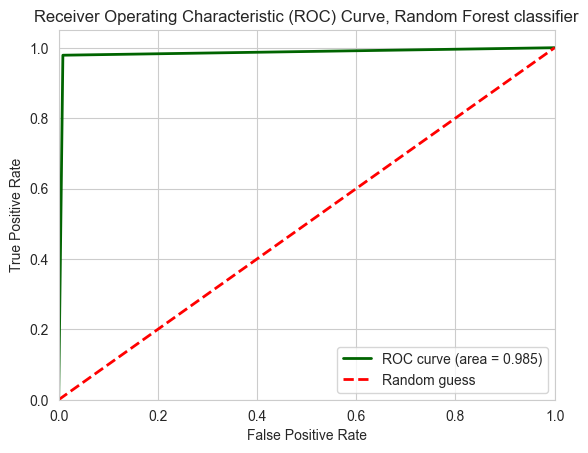

In [443]:
# to plot ROC curve for Random Forest classifier model
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_rf)
roc_auc = roc_auc_score(y_test, y_test_pred_rf)

# AUC score for Decision Tree classifier = 0.985
plt.figure()
plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve, Random Forest classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [451]:
rf_val_cm = confusion_matrix(y_val, y_val_pred_rf, normalize='true')
rf_val_cm

array([[0.98510638, 0.01489362],
       [0.01066098, 0.98933902]])

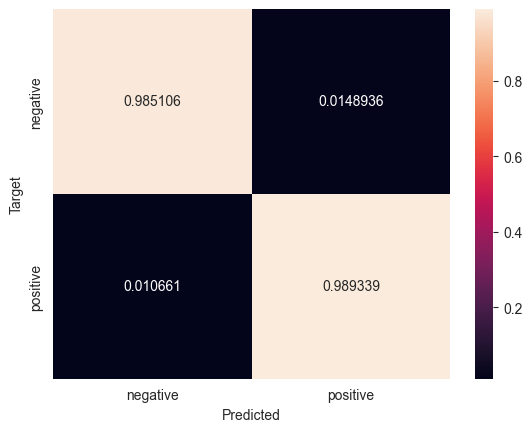

In [455]:
# to plot Random Forest classifier Confusion matrix, validation set
def plot_cm(rf_val_cm):
    classes = ['negative','positive']
    df_rf_val_cm = pd.DataFrame(rf_val_cm, index=classes, columns=classes)
    ax = sns.heatmap(df_rf_val_cm, annot=True, fmt='g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")

plot_cm(rf_val_cm)
plt.show()

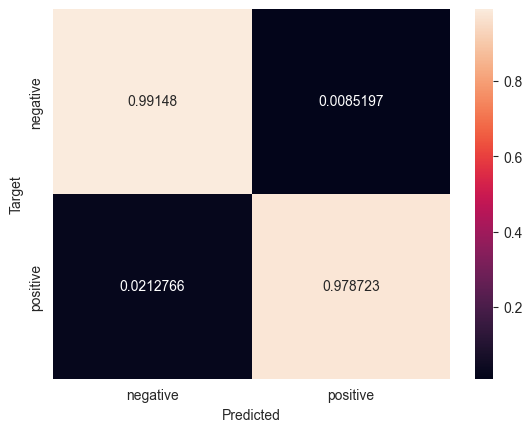

In [457]:
# to plot confusion matrix for Random Forest testing 
# Accuracy rate for true positive (Survive = 1) = 97.87%
# accuracy rate for true negatives = 99.14%
rf_test_cm = confusion_matrix(y_test, y_test_pred_rf, normalize='true')
plot_cm(rf_test_cm)
plt.show()

In [461]:
rf_model = rf_clf.best_estimator_

In [463]:
rf_feature_importances = rf_model.feature_importances_

In [467]:
rf_feature_importances

array([0.12282668, 0.12036723, 0.20724316, 0.12092667, 0.13169108,
       0.02723636, 0.02590125, 0.03064223, 0.13333936, 0.01815525,
       0.01951403, 0.01854625, 0.00323942, 0.00922786, 0.00688462,
       0.00093853, 0.00071043, 0.00093481, 0.00088562, 0.00078919])

In [475]:
pd.DataFrame(data= rf_feature_importances, index= X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

,Importance
Creatinine,0.207243
Weight,0.133339
Creatine phosphokinase,0.131691
Age,0.122827
Platelets,0.120927
Sodium,0.120367
Height,0.030642
Blood Pressure,0.027236
Hemoglobin,0.025901
Smoke_Yes,0.019514


In [479]:
# to read into a new dataframe
rfc_imp = pd.DataFrame(data= rf_feature_importances, index= X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

C:\Users\miche\AppData\Local\Temp\ipykernel_21460\2477425004.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rfc_imp, y=rfc_imp.index, x='Importance', palette='magma')


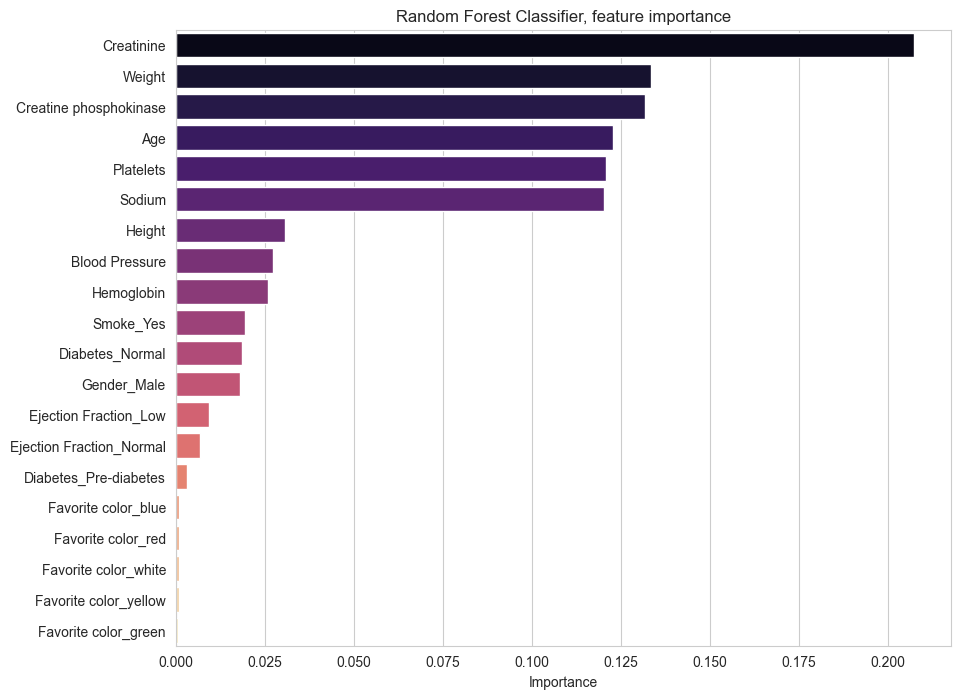

In [487]:
# to visualise in a barplot
plt.figure(figsize=(10,8), dpi=100)
sns.barplot(data=rfc_imp, y=rfc_imp.index, x='Importance', palette='magma')
plt.title('Random Forest Classifier, feature importance')
plt.ylabel('')
plt.show()

In [ ]:
# Predictors of Coronary Artery disease in patients: 1) Creatinine, 2) Weight, 3) Creatine phosphokinase, 4) Age